2024-11-19 15:33:44.806948: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Outcome
0    500
1    268
Name: count, dtype: int64


/var/folders/rt/462tlf2j5bsgw0jc6blrpts80000gn/T/ipykernel_7185/4281174372.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x = "Outcome", palette="deep")


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/85
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.6080 - loss: 0.7028
Epoch 2/85
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6645 - loss: 0.6279
Epoch 3/85
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6911 - loss: 0.5762
Epoch 4/85
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7543 - loss: 0.5404
Epoch 5/85
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7397 - loss: 0.5198
Epoch 6/85
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7724 - loss: 0.4966
Epoch 7/85
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7452 - loss: 0.4873
Epoch 8/85
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7992 - loss: 0.4459
Epoch 9/85
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7882 - loss: 0.4389
Epoch 10/85
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7899 - loss: 0.4475
Epoch 11/85
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7779 - loss: 0.4304
Epoch 12/85
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.79

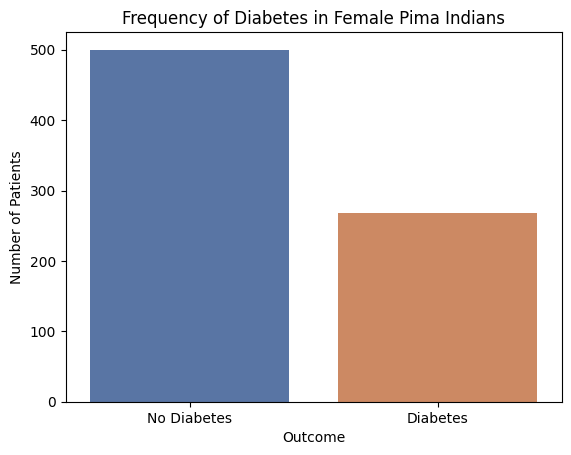

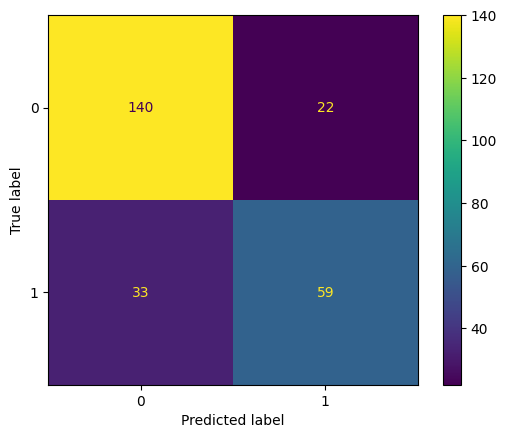

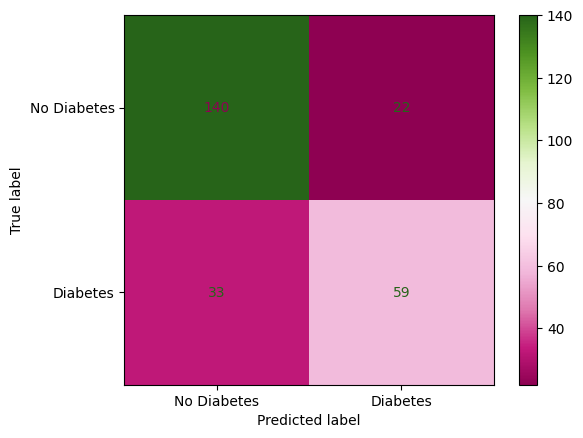

In [ ]:
## NEURAL NETWORK

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from keras import Sequential
from keras import layers
from keras import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LinearRegression

seed = 42
np.random.seed(seed)

# read dataset
df = pd.read_csv('diabetes.csv')

# seeing how balanced the data is
print(df.Outcome.value_counts()) # data is imbalanced - roughly a 2:1 ratio of nodiabetes:diabetes
Z = ['No Diabetes', 'Diabetes']
x_axis = np.arange(len(Z)) 
sns.countplot(df, x = "Outcome", palette="deep")
plt.title('Frequency of Diabetes in Female Pima Indians')
plt.ylabel("Number of Patients")
plt.xticks(x_axis, Z, rotation=0)

# change the 0 to nan (but not for pregnancies)
df_copycopy = df.copy(deep=True) # When deep=True (default), a new object will be created with a copy of the calling object's data and indices
df_copycopy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df_copycopy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

# showing how many nans there are
print(df_copycopy.isnull().sum())

# assigning X and y
X = pd.DataFrame((df_copycopy.drop(['Outcome'], axis=1)), columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
y = df_copycopy.Outcome

# splitting data before adding missing values (to prevent data leakage) and before doing scaling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7) # random state shuffles the data

# scaling ONLY train data
# https://scikit-learn.org/stable/modules/neural_networks_supervised.html (near the end)
# could use pipeline
scaler = StandardScaler()
transformed_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

# scaling ONLY test data
transformed_X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

# dealing with nan values in transformed_X_train by inputting mean
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean') # probably would want to use median for some columns but more simple to use mean for all (could be achieved with Pipeline I think)
imp.fit(transformed_X_train)
transformed_X_train = imp.transform(transformed_X_train)

# dealing with nan values in transformed_X_test by inputting mean
imp2 = SimpleImputer(missing_values=np.nan, strategy='mean') # probably would want to use median for some columns but more simple to use mean for all (could be achieved with Pipeline I think)
imp2.fit(transformed_X_test)
transformed_X_test = imp2.transform(transformed_X_test)

# linear regression with this transformed data
linearmodel = LinearRegression().fit(transformed_X_train, y_train)
linearmodel.coef_

# neural network
model = Sequential()

# add first hidden layer
model.add(layers.Dense(32, activation='relu', input_dim=8))

# add second hidden layer
model.add(layers.Dense(16, activation='relu'))

# output layer
model.add(layers.Dense(1, activation='sigmoid'))

# compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# training for 85 epochs
model.fit(transformed_X_train, y_train, epochs=85)

# evaluating
y_preds = model.predict(transformed_X_test).round() # .round to make it binary because otherwise the y_preds were continuous

# confusion matrix
cm = confusion_matrix(y_test, y_preds, labels = None)
display = ConfusionMatrixDisplay(confusion_matrix = cm)
display.plot()

# alternative (recommended) way to display confusion matrix
display2 = ConfusionMatrixDisplay.from_predictions(y_test, y_preds, display_labels = Z, cmap = 'PiYG')